# Feature Engineering for Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import datetime
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

In [2]:
za_data = pd.read_csv("Classification/all_files_skrv1.csv")

In [3]:
za_data.columns

Index(['trackAppearanceCount', 'artistAppearanceCount', 'rank', 'uri',
       'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank',
       'weeks_on_chart', 'streams', 'End Date', 'Week', 'Year', 'End Date Dt',
       'Seconds since Epoch', 'End Date Aggregated', 'ArtistCount',
       'main_artist', 'isTopTen', 'Artist and Track', 'rank difference',
       'Position over Time', 'IsGirlGroup', 'IsBoyGroup'],
      dtype='object')

In [4]:
len(list(za_data.columns))

25

In [5]:
za_data["End Date Dt"] = za_data["End Date Dt"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [6]:
za_data.shape

(37200, 25)

In [7]:
za_data_test = za_data[za_data['End Date Dt'] > datetime(2023, 5, 31)]

za_data_test_first_time = za_data_test[za_data_test["trackAppearanceCount"] == 0]
za_data_test_first_time_df = za_data_test_first_time[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]


za_data_test = za_data_test[za_data_test["trackAppearanceCount"] != 0]
za_data = za_data[za_data['End Date Dt'] <= datetime(2023, 5, 31)]

In [8]:
za_data_df = za_data[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]
za_data_test_df = za_data_test[['main_artist', 'track_name', "trackAppearanceCount", "artistAppearanceCount", "rank", "peak_rank", 'previous_rank', 'weeks_on_chart', 'streams', 'ArtistCount', 'isTopTen', 'rank difference']]

In [9]:
# za_data["End Date"].unique().tolist()

In [10]:
za_data_test_first_time_df

,main_artist,track_name,trackAppearanceCount,artistAppearanceCount,rank,peak_rank,previous_rank,weeks_on_chart,streams,ArtistCount,isTopTen,rank difference
104,$,530,0,40,148,148,-1,1,34252,1,0,0
106,$,BACK TO ME,0,4,85,85,-1,1,45808,1,0,0
108,$,BEG FORGIVENESS,0,12,190,190,-1,1,27301,1,0,0
109,$,BURN,0,3,84,84,-1,1,46299,1,0,0
115,$,CARNIVAL,0,0,45,45,-1,1,67375,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36927,j-hope,what if (dance mix),0,133,107,107,-1,1,42255,1,0,0
36930,keshi,Say,0,12,112,112,-1,1,46271,1,0,0
37157,tripleS,Girls Never Die,0,28,25,25,-1,1,115270,1,0,0
37182,tuki.,tuki._NA,0,0,139,139,-1,1,34920,1,0,0


In [11]:
groupby_cols = ['main_artist', 'track_name']

In [12]:
za_data_test_first_time

,trackAppearanceCount,artistAppearanceCount,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,...,Seconds since Epoch,End Date Aggregated,ArtistCount,main_artist,isTopTen,Artist and Track,rank difference,Position over Time,IsGirlGroup,IsBoyGroup
104,0,40,148,spotify:track:4hm8BZ7nLceFNZUexWTxx4,"$, Kanye West, Ty Dolla $ign",530,YZY,148,-1,1,...,1.723075e+09,2024-08-01,1,$,0,"$, Kanye West, Ty Dolla $ign; 530",0,0,False,False
106,0,4,85,spotify:track:1icgLGTpX2fQXKRe4D7w2b,"$, Kanye West, Ty Dolla $ign",BACK TO ME,Ye,85,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign; BACK TO ME",0,0,False,False
108,0,12,190,spotify:track:4ihV1wv7QmjbkLHaT9lA4s,"$, Kanye West, Ty Dolla $ign",BEG FORGIVENESS,Ye,190,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign; BEG FORGIVENESS",0,0,False,False
109,0,3,84,spotify:track:04CyMEHliadfQWMUJb1w99,"$, Kanye West, Ty Dolla $ign",BURN,Ye,84,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign; BURN",0,0,False,False
115,0,0,45,spotify:track:3w0w2T288dec0mgeZZqoNN,"$, Kanye West, Ty Dolla $ign, Rich The Kid, Pl...",CARNIVAL,Ye,45,-1,1,...,1.707955e+09,2024-02-01,1,$,0,"$, Kanye West, Ty Dolla $ign, Rich The Kid, Pl...",0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36927,0,133,107,spotify:track:6W6kWAXbMS2aOJXoUpw7iI,"j-hope, JINBO the SuperFreak",what if (dance mix),BIGHIT MUSIC,107,-1,1,...,1.712189e+09,2024-04-01,1,j-hope,0,"j-hope, JINBO the SuperFreak; what if (dance mix)",0,0,False,False
36930,0,12,112,spotify:track:0kQANryNS3gaQ1OAA1yPNg,keshi,Say,Island Records,112,-1,1,...,1.721261e+09,2024-07-01,1,keshi,0,keshi; Say,0,0,False,False
37157,0,28,25,spotify:track:45OflED18VsURGw2z0Y6Cv,tripleS,Girls Never Die,MODHAUS,25,-1,1,...,1.715818e+09,2024-05-01,1,tripleS,0,tripleS; Girls Never Die,0,0,True,False
37182,0,0,139,spotify:track:2cxcqKwQtfKq7giphxjzOu,tuki.,tuki._NA,月面着陸計画,139,-1,1,...,1.715213e+09,2024-05-01,1,tuki.,0,tuki.; tuki._NA,0,0,False,False


### 0. Entry Position into Chart

In [13]:
def findingtheentrypos(za_data):
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("min")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Start Date"]
    
    groupednum_songs_df = groupednum_songs_df.drop_duplicates()
    groupednum_songs_df.shape
    
    groupednum_songs_ls = groupednum_songs_df.values.tolist()
    
    thefirstones = []
    for artsongls in groupednum_songs_ls:
        theartist = artsongls[0]
        thetrack = artsongls[1]
        thestartdate = artsongls[2]
        thefirstones.append(za_data[(za_data["main_artist"] == theartist) & (za_data["track_name"] == thetrack) & (za_data["End Date"] == thestartdate)])
        
    first_track_position_df = pd.concat(thefirstones)
    
    first_track_position_df_relevant = first_track_position_df[["main_artist", "track_name", "rank", "End Date"]]
    first_track_position_df_relevant.columns = ["main_artist", "track_name", "entry rank", "End Date"]
    
    groupednum_songs = za_data.groupby(groupby_cols)["End Date"].agg("count")
    groupednum_songs_df = pd.DataFrame(groupednum_songs).reset_index()
    groupednum_songs_df.columns = groupby_cols + ["Artist Song Count"]
    
    return groupednum_songs_df, first_track_position_df_relevant

### 1. Streams

In [14]:
def findtheMinMaxMeanStreams(za_data):
    groupedmax_streams = za_data.groupby(groupby_cols)["streams"].agg("max")
    groupedmax_streams_df = pd.DataFrame(groupedmax_streams).reset_index()
    groupedmax_streams_df.columns = groupby_cols + ["Max Streams per Song"]
    
    groupedmin_streams = za_data.groupby(groupby_cols)["streams"].agg("min")
    groupedmin_streams_df = pd.DataFrame(groupedmin_streams).reset_index()
    groupedmin_streams_df.columns = groupby_cols + ["Min Streams per Song"]
    
    groupedsum_streams = za_data.groupby(groupby_cols)["streams"].agg("sum")
    groupedsum_streams_df = pd.DataFrame(groupedsum_streams).reset_index()
    groupedsum_streams_df.columns = groupby_cols + ["Total Streams per Song"]

    groupedmean_streams = za_data.groupby(groupby_cols)["streams"].agg("mean")
    groupedmean_streams_df = pd.DataFrame(groupedmean_streams).reset_index()
    groupedmean_streams_df.columns = groupby_cols + ["Mean Streams per Song"]
    
    return groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df

### 2. Positions

In [15]:
def findtheMinMaxPositions(za_data):
    groupedpos_streams = za_data.groupby(groupby_cols)["rank"].agg("min")
    groupedpos_streams_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedpos_streams_df.columns = groupby_cols + ["Min Position per Song"]

    groupedposmax_streams = za_data.groupby(groupby_cols)["rank"].agg("max")
    groupedposmax_streams_df = pd.DataFrame(groupedposmax_streams).reset_index()
    groupedposmax_streams_df.columns = groupby_cols + ["Max Position per Song"]
    
    return groupedpos_streams_df, groupedposmax_streams_df

### Number of songs per artist

In [16]:
def findtheMaxArtistAppearanceTimes(za_data):
    
    groupedpos_streams = za_data.groupby(["main_artist"])["artistAppearanceCount"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = ["main_artist"] + ["Max Artist Appearance"]
    
    return groupedmin_songs_df

#### Maximum number of times an artist has appeared on the chart

In [17]:
def findtheMinMaxNumofSongs(za_data):
    
    groupedpos_streams = za_data.groupby(["main_artist"])["Artist Song Count"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = ["main_artist"] + ["Max Song Count per artist"]
    
    return groupedmin_songs_df

#### Number of weeks a song spent on the chart per artist

In [18]:
def findtheWeeksonChartperSong(za_data):
    
    groupedpos_streams = za_data.groupby(groupby_cols)["weeks_on_chart"].agg("max")
    groupedmin_songs_df = pd.DataFrame(groupedpos_streams).reset_index()
    groupedmin_songs_df.columns = groupby_cols + ["Max Weeks on Chart per song"]
    
    return groupedmin_songs_df

#### First week streams and first week positions

In [19]:
def findthePosonWeeksonChartperSong(za_data):
    
    za_data_first_time = za_data[za_data["trackAppearanceCount"] == 0]
    za_data_first_time_df = za_data_first_time[['main_artist', 'track_name', "rank", 'streams']]
    za_data_first_time_df.columns = ['main_artist', 'track_name', "first_week_rank", 'first_week_streams']
    
    return za_data_first_time_df

### 3. Dates

## Combine the dfs

In [20]:
def combinedataframes(groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df, groupedpos_streams_df, groupedposmax_streams_df, groupednum_songs_df):
    groupeddf = groupedmax_streams_df
    
    groupeddf["Min Streams per Song"] = groupedmin_streams_df["Min Streams per Song"]
    groupeddf["Total Streams per Song"] = groupedsum_streams_df["Total Streams per Song"]
    groupeddf["Mean Streams per Song"]= groupedmean_streams_df["Mean Streams per Song"]
    groupeddf["Min Position per Song"] = groupedpos_streams_df["Min Position per Song"]
    groupeddf["Max Position per Song"] = groupedposmax_streams_df["Max Position per Song"]
    groupeddf["Artist Song Count"] = groupednum_songs_df["Artist Song Count"]
    
    groupeddf["MaxMin Difference Position"] = groupeddf["Max Position per Song"] - groupeddf["Min Position per Song"]
    groupeddf["MaxMin Difference Streams"] = groupeddf["Max Streams per Song"] - groupeddf["Min Streams per Song"]
    
    groupeddf["MaxMin Ratio Position"] = groupeddf["Max Position per Song"] / groupeddf["Min Position per Song"]
    groupeddf["MaxMin Ratio Streams"] = groupeddf["Max Streams per Song"] / groupeddf["Min Streams per Song"]
    
    groupeddf.drop(["Max Position per Song"], inplace=True, axis=1)
    
    groupeddf_startpos = groupeddf.merge(first_track_position_df_relevant[["main_artist", "track_name", "entry rank"]], left_on=["main_artist", "track_name"], right_on=["main_artist", "track_name"], how="inner")
    
    groupeddf_startpos["main_art_track"] = groupeddf_startpos["main_artist"] + groupeddf_startpos["track_name"]
    
    groupeddf_startpos_regress = groupeddf_startpos[['main_artist', "main_art_track", 'entry rank', 'Min Position per Song']].drop_duplicates()
    
    return groupeddf, groupeddf_startpos_regress
    

In [21]:
some_artists_of_interest = ["6LACK", "9umba", "BNXN fka Buju", "Black Coffee", "Big Zulu"]
groupednum_songs_df, first_track_position_df_relevant = findingtheentrypos(za_data)
groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df = findtheMinMaxMeanStreams(za_data)
groupedpos_streams_df, groupedposmax_streams_df = findtheMinMaxPositions(za_data)
groupeddf, groupeddf_startpos_regress = combinedataframes(groupedmax_streams_df, groupedmin_streams_df, groupedsum_streams_df, groupedmean_streams_df, groupedpos_streams_df, groupedposmax_streams_df, groupednum_songs_df)
filenname = "zaall"

In [22]:
groupby_cols

['main_artist', 'track_name']

In [23]:
maxsongperartistdf = findtheMinMaxNumofSongs(groupeddf)

In [24]:
weeksonchartpersong = findtheWeeksonChartperSong(za_data)

In [25]:
firstweekstreamsandrank = findthePosonWeeksonChartperSong(za_data)

In [26]:
maxartistappearances = findtheMaxArtistAppearanceTimes(za_data)

In [27]:
fingroupeddf = groupeddf.merge(maxsongperartistdf, left_on=["main_artist"], right_on=["main_artist"], how="inner")
fingroupeddf = fingroupeddf.drop(["Artist Song Count"],axis=1)

In [28]:
fingroupeddf = fingroupeddf.merge(weeksonchartpersong, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [29]:
fingroupeddf = fingroupeddf.merge(firstweekstreamsandrank, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [30]:
fingroupeddf = fingroupeddf.merge(maxartistappearances, left_on=["main_artist"], right_on=["main_artist"], how="inner")

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(za_data["source"])

za_encoded_source = le.transform(za_data["source"])
za_data["encoded_source"] = za_encoded_source
zarelevantsource = za_data[["main_artist", "track_name", "encoded_source"]]
zarelevantsource = zarelevantsource.drop_duplicates()

In [32]:
fingroupeddf = fingroupeddf.merge(zarelevantsource, left_on=groupby_cols, right_on=groupby_cols, how="inner")

In [33]:
fingroupeddf.columns

Index(['main_artist', 'track_name', 'Max Streams per Song',
       'Min Streams per Song', 'Total Streams per Song',
       'Mean Streams per Song', 'Min Position per Song',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams',
       'Max Song Count per artist', 'Max Weeks on Chart per song',
       'first_week_rank', 'first_week_streams', 'Max Artist Appearance',
       'encoded_source'],
      dtype='object')

In [34]:
fingroupeddf.to_csv("Classification/cleanedartistsong.csv", index=False)

##### LINEAR REGRESSION NUMBER OF WEEKS

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
fingroupeddf = fingroupeddf.reset_index()
fingroupeddf = fingroupeddf.drop(["index"], axis=1)

In [38]:
fingroupeddf.shape

(2153, 17)

In [39]:
fingroupeddf.columns

Index(['main_artist', 'track_name', 'Max Streams per Song',
       'Min Streams per Song', 'Total Streams per Song',
       'Mean Streams per Song', 'Min Position per Song',
       'MaxMin Difference Position', 'MaxMin Difference Streams',
       'MaxMin Ratio Position', 'MaxMin Ratio Streams',
       'Max Song Count per artist', 'Max Weeks on Chart per song',
       'first_week_rank', 'first_week_streams', 'Max Artist Appearance',
       'encoded_source'],
      dtype='object')

In [40]:
numsongsperartist = pd.DataFrame(fingroupeddf.groupby(["main_artist"])["track_name"].count())
numsongsperartist = numsongsperartist.reset_index()
numsongsperartist.columns = ["main_artist", "num_songs"]

totstreamsperartist = pd.DataFrame(fingroupeddf.groupby(["main_artist"])["Total Streams per Song"].sum())
totstreamsperartist = totstreamsperartist.reset_index()
totstreamsperartist.columns = ["main_artist", "total_streams"]

maxstreamsontrack = pd.DataFrame(fingroupeddf.groupby(["main_artist"])["Max Streams per Song"].max())
maxstreamsontrack = maxstreamsontrack.reset_index()
maxstreamsontrack.columns = ["main_artist", "max_streams"]

highestposperartist = pd.DataFrame(fingroupeddf.groupby(["main_artist"])["Min Position per Song"].min())
highestposperartist = highestposperartist.reset_index()
highestposperartist.columns = ["main_artist", "highest_position"]

maxweeksperartist = pd.DataFrame(fingroupeddf.groupby(["main_artist"])["Max Weeks on Chart per song"].max())
maxweeksperartist = maxweeksperartist.reset_index()
maxweeksperartist.columns = ["main_artist", "max_weeks"]

In [41]:
numtot = numsongsperartist.merge(totstreamsperartist, left_on=["main_artist"], right_on=["main_artist"], how="inner")
numtotmax = numtot.merge(maxstreamsontrack, left_on=["main_artist"], right_on=["main_artist"], how="inner")
numtotmaxhighest = numtotmax.merge(highestposperartist, left_on=["main_artist"], right_on=["main_artist"], how="inner")
numtotmaxhighestmaxweeks = numtotmaxhighest.merge(maxweeksperartist, left_on=["main_artist"], right_on=["main_artist"], how="inner")

In [42]:
numtotmaxhighestmaxweeks

,main_artist,num_songs,total_streams,max_streams,highest_position,max_weeks
0,Damons year,2,1192682,45416,48,40
1,(G)I-DLE,19,9166639,322340,1,63
2,-,1,7767,7767,182,1
3,10-FEET,1,797802,76361,20,17
4,104,1,135384,22911,107,7
...,...,...,...,...,...,...
610,pH-1,2,200780,23120,60,7
611,salem ilese,1,253450,28097,39,12
612,sokodomo,2,2263504,177110,1,42
613,toigo,2,263887,37025,86,9


In [43]:
groupsdf = numtotmaxhighestmaxweeks[["num_songs", "total_streams", "max_streams", "highest_position", "max_weeks"]]
scaler = StandardScaler()
groupsdf1 = scaler.fit_transform(groupsdf)

In [62]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(groupsdf1)

In [63]:
numtotmaxhighestmaxweeks["cluster"] = kmeans.labels_

In [64]:
numtotmaxhighestmaxweeks[["cluster"]].value_counts()

cluster
0          190
5          167
3          155
6           45
1           39
4           11
7            6
2            1
8            1
dtype: int64

In [68]:
numtotmaxhighestmaxweeks[numtotmaxhighestmaxweeks["cluster"]==7]

,main_artist,num_songs,total_streams,max_streams,highest_position,max_weeks,cluster
159,Drake,42,2738663,51546,6,23,7
296,Kanye West,28,1152764,51228,9,10,7
385,NCT 127,35,2284272,74963,5,20,7
388,NCT DREAM,38,6123976,224102,3,23,7
459,SEVENTEEN,33,6056790,188100,6,44,7
520,Taylor Swift,30,4359406,155936,6,31,7


In [48]:
X = fingroupeddf.drop(["main_artist", "track_name", "Max Weeks on Chart per song", 'Max Artist Appearance'], axis=1)
# X = X[['first_week_rank', 'first_week_streams','Total Streams per Song', 'Min Position per Song', 'MaxMin Difference Position', 'MaxMin Ratio Position', 'MaxMin Ratio Streams']]
# X = X[['MaxMin Difference Position', 'MaxMin Ratio Streams', "first_week_streams"]]
y = fingroupeddf["Max Weeks on Chart per song"]

In [49]:
thecols = list(X.columns)

In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [51]:
X = pd.DataFrame(X)

In [52]:
X.columns = thecols

In [53]:
X

,Max Streams per Song,Min Streams per Song,Total Streams per Song,Mean Streams per Song,Min Position per Song,MaxMin Difference Position,MaxMin Difference Streams,MaxMin Ratio Position,MaxMin Ratio Streams,Max Song Count per artist,first_week_rank,first_week_streams,encoded_source
0,-0.157453,0.096126,-0.296451,-0.022915,0.272788,0.216548,-0.229008,-0.256796,-0.336833,0.012228,0.976507,-0.151805,-1.516394
1,0.200543,-0.045504,0.974855,0.152864,-0.671249,1.201734,0.261906,-0.150641,0.419879,0.012228,1.279110,-0.314106,-1.516394
2,-0.424346,-0.155905,-0.407864,-0.362983,0.500057,-1.128310,-0.456584,-0.295964,-0.622469,0.645631,0.219999,-0.359855,-0.981801
3,0.905075,2.843884,-0.261191,1.961879,-0.950964,-0.831190,0.001865,-0.265359,-0.466360,0.645631,-0.855923,0.883231,-0.981801
4,-0.074448,0.642968,-0.369070,0.251934,-0.164266,-0.471519,-0.339537,-0.270129,-0.532159,0.645631,-0.469264,0.113331,-0.981801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,2.900303,-0.091187,2.417121,1.187841,-1.492911,1.874163,3.568343,8.725990,5.501094,0.067307,-1.746921,3.029748,-0.555796
2149,0.028525,0.221110,-0.123589,0.163483,-0.006926,0.576219,-0.050828,-0.236909,-0.160732,-0.841488,-0.317962,0.247637,-0.555796
2150,-0.344006,0.137551,-0.421546,-0.186186,1.671362,-1.175223,-0.472292,-0.297171,-0.648050,-0.841488,1.295921,-0.238250,-0.547443
2151,0.147221,0.238531,0.224016,0.207182,-0.688731,1.154821,0.087022,-0.150477,-0.009895,-0.593635,0.253622,-0.031430,0.070681


In [55]:
X_train = X.head(4000)
y_train = y.head(4000)

X_test = X.iloc[4001:]
y_test = y.iloc[4001:]

# X_train = X.head(1800)
# y_train = y.head(1800)

# X_test = X.iloc[1801:]
# y_test = y.iloc[1801:]

In [56]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.7895190731801885
[ 8.50315261e+13 -2.70157703e+13  1.73171863e+01 -7.35401434e+00
 -2.39804935e-01  5.98830076e+00 -6.98028859e+13  1.04660204e-01
  4.32350334e+00  1.88425883e+00  1.85953827e+00  1.20664655e-01
  7.05174038e-02]
11.491523700292051


In [69]:
# all_preds = reg.predict(X_test)
# thepredsy = pd.DataFrame(all_preds)

# thepredsy.columns = ["predictions"]
# thepredsy["actuals"] = list(y_test)
# thepredsy["predictions"] = thepredsy["predictions"].astype(int)
# thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

# truepreds = thepredsy[thepredsy["diff"]==0]
# truepreds1 = thepredsy[thepredsy["diff"]==1]
# truepreds2 = thepredsy[thepredsy["diff"]==-1]
# fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

# print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

In [ ]:
mae = mean_absolute_error(y_test, all_preds)

In [ ]:
mae

In [ ]:
truepreds.shape[0], fintruepeds.shape[0], all_preds.shape[0]

In [ ]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

In [ ]:
# X[["first_week_rank", "first_week_streams"]] - 7 , 1.26%
# ["first_week_rank", "first_week_streams", "Max Streams per Song"] - 15 , 2.69%
# [all] - 48 , 8.62%
# X[["first_week_rank", "first_week_streams", "Max Streams per Song", "Total Streams per Song"]] - 28 , 5.02%

# X[["first_week_rank", "first_week_streams", "Max Streams per Song", "Total Streams per Song", 'Max Song Count per artist']] - 37, 6.64% 

# X[["Mean Streams per Song", "first_week_rank"]]- 8 , 1.44%

# ["MaxMin Ratio Position", "first_week_rank", "Max Song Count per artist" - 7 , 1.26%

In [70]:
from sklearn import linear_model
reglinear_model = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reglinear_modelvf = reglinear_model.fit(X_train, y_train)

In [71]:
all_preds = reglinear_modelvf.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

In [72]:
print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

NameError: name 'all_preds' is not defined

In [73]:
mae = mean_absolute_error(y_test, all_preds)
mae

NameError: name 'all_preds' is not defined

In [74]:
truepreds.shape[0], fintruepeds.shape[0]

NameError: name 'truepreds' is not defined

In [75]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

NameError: name 'truepreds' is not defined

In [76]:
bayesianreg = linear_model.BayesianRidge()
bayesianregvf = bayesianreg.fit(X_train, y_train)

all_preds = bayesianregvf.predict(X_test)
thepredsy = pd.DataFrame(all_preds)

thepredsy.columns = ["predictions"]
thepredsy["actuals"] = list(y_test)
thepredsy["predictions"] = thepredsy["predictions"].astype(int)
thepredsy["diff"] = thepredsy["predictions"] - thepredsy["actuals"]

truepreds = thepredsy[thepredsy["diff"]==0]
truepreds1 = thepredsy[thepredsy["diff"]==1]
truepreds2 = thepredsy[thepredsy["diff"]==-1]
fintruepeds = pd.concat([truepreds,truepreds1,truepreds2])

truepreds.shape[0], fintruepeds.shape[0]

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

In [77]:
print("Coefficient of determination: %.2f" % r2_score(y_test, all_preds))

NameError: name 'all_preds' is not defined

In [78]:
mae = mean_absolute_error(y_test, all_preds)
mae

NameError: name 'all_preds' is not defined

In [79]:
(truepreds.shape[0] / thepredsy.shape[0]) * 100, (fintruepeds.shape[0] / thepredsy.shape[0]) * 100

NameError: name 'truepreds' is not defined

Feature: 0, Score: 85031526149149.78125
Feature: 1, Score: -27015770269992.49219
Feature: 2, Score: 17.31719
Feature: 3, Score: -7.35401
Feature: 4, Score: -0.23980
Feature: 5, Score: 5.98830
Feature: 6, Score: -69802885883541.40625
Feature: 7, Score: 0.10466
Feature: 8, Score: 4.32350
Feature: 9, Score: 1.88426
Feature: 10, Score: 1.85954
Feature: 11, Score: 0.12066
Feature: 12, Score: 0.07052


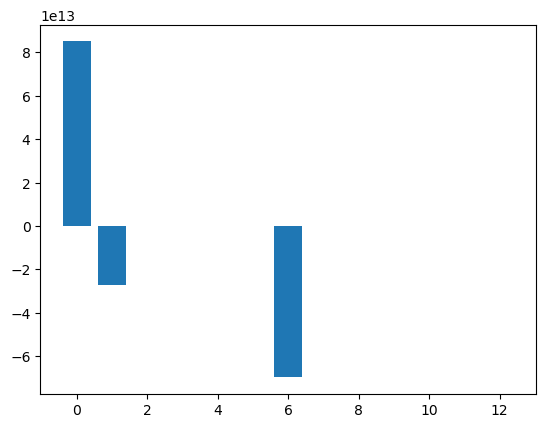

In [80]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()